In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv",parse_dates=["posted","scraped"])


# df = df.loc[df.test==False]

df["weekday"] = df.posted.dt.day_name()
df.head()


,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test,weekday
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False,Saturday
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False,Saturday
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False,Friday
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False,Friday
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False,Friday


In [3]:
subjects = {"holiday":["santa","xmas","christmas","holiday","valentine","halloween","easter","thanksgiving"]
           ,"death/injury":["rip","broke her","broke his","hard time bending ","not feeling so good","not feeling well","the labs gone","splenectomy","post op","passed away","miss her","miss him","surgery","seizure","missing","hospital","hit by car","died"]
           ,"sleep":["comfy","exhausted","tuckered","yawn","relax","cozy","cuddly","chill","dreaming","lazy","bed time","bedtime","slumber","lazing","blanket","snooze","sleepy","snug ","sleep","cuddlin","tired","snoozin","loungin","snuggle","cuddle","chillin","sweepy","leisure","nappin","nap ","nap,"]
           ,"new":["new add","rescued","newest","just adopted","welcome to the fam"]
            ,"sun":["sunny","beach","enjoying morning sun","soaking up the sun","enjoying the sun","sunshine","enjoying the shade","in the sun","sunbeam","sun beam"]
           ,"snow":["snow","winter","cold","-3"]
           ,"attributes":["tail wrap","bean","paw","face","eyes","snoot"]
           ,"playful":["game of tag","zoomies","play","fetch","tug"]
           ,"birthday":["birthday"]
#            ,"naughty":["naughty","bad girl","bad boy"]
#            ,"poses":["pose","photogenic","photoshoot"]
           ,"walk":["walk","stroll","leash","hike"]
            ,"greeting":["good morning","good evening","good night","Good murrrrning"]+[f'happy {wk.lower()}' for wk in df.weekday.unique()]
           ,"cute":["baby","babies","goodest","adorable","beautiful","cutie","cute","handsome"]
           }


def label(x):
    
    for subject,keywords in subjects.items():
        
        for kw in keywords:
            if kw in x.lower():
                return subject
            
    return "Other"

df["subject"] = df.title.apply(label)

df.subject.value_counts()

Other           41358
sleep            5360
cute             3436
attributes       1666
holiday          1561
snow             1018
death/injury      840
walk              730
sun               653
playful           606
birthday          568
new               345
greeting          271
Name: subject, dtype: int64

In [20]:
# !pip install -U sentence-transformers

In [4]:
sentences = df.title.tolist()

In [5]:
from sentence_transformers import SentenceTransformer

In [6]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [7]:
embeddings = model.encode(sentences)

In [8]:
embeddings

array([[ 0.03046942,  0.03918196,  0.06798835, ...,  0.07129922,
        -0.0044628 ,  0.00143127],
       [-0.01737003,  0.11530168, -0.0367645 , ..., -0.10181767,
        -0.02940663, -0.0117374 ],
       [-0.0544079 ,  0.12731178,  0.05905663, ..., -0.1173457 ,
         0.00163739,  0.05499895],
       ...,
       [-0.0089546 , -0.04991211,  0.00376923, ..., -0.07092911,
        -0.03080897,  0.03702712],
       [-0.03744419,  0.08625056,  0.01791043, ..., -0.04310161,
         0.03476867,  0.03587739],
       [-0.0103048 ,  0.06355123,  0.10262633, ..., -0.03881223,
        -0.00872107,  0.00628251]], dtype=float32)

In [10]:
from sklearn.manifold import TSNE

In [29]:
NDIM = 3

df[[f'se{i}' for i in range(NDIM)]] = TSNE(n_components=NDIM, learning_rate='auto',init='random', perplexity=3).fit_transform(embeddings)

In [13]:
df[["se1","se2"]] = embeddings2

In [17]:
df.subject.unique()

array(['Other', 'greeting', 'sun', 'snow', 'sleep', 'death/injury',
       'attributes', 'cute', 'playful', 'holiday', 'new', 'birthday',
       'walk'], dtype=object)

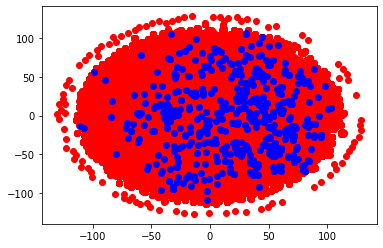

In [23]:
plt.scatter(df[df.subject!="death/injury"]["se1"],df[df.subject!="death/injury"]["se2"],c="r")
plt.scatter(df[df.subject=="death/injury"]["se1"],df[df.subject=="death/injury"]["se2"],c="b");

In [28]:
embeddings.shape

(46730, 384)

In [30]:
from mpl_toolkits import mplot3d

In [35]:
df.subject.unique()

array(['Other', 'greeting', 'sun', 'snow', 'sleep', 'death/injury',
       'attributes', 'cute', 'playful', 'holiday', 'new', 'birthday',
       'walk'], dtype=object)

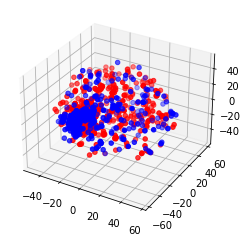

In [47]:
topic1 = "sun"
topic2 = "snow"

ax = plt.axes(projection='3d')
ax.scatter3D(df[df.subject==topic1]["se0"], df[df.subject==topic1]["se1"], df[df.subject==topic1]["se2"],c="b")
ax.scatter3D(df[df.subject==topic2]["se0"], df[df.subject==topic2]["se1"], df[df.subject==topic2]["se2"],c="r");

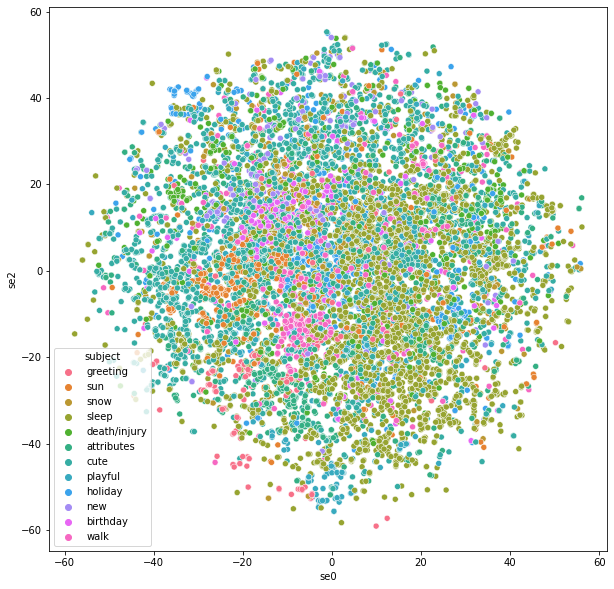

In [57]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=df[~(df.subject=="Other")],x="se0",y="se2",hue="subject");

### KNN

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
knn = NearestNeighbors(n_neighbors=10, metric="cosine")
knn.fit(embeddings)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [12]:
idx = 0
distances,indices = knn.kneighbors(embeddings[idx,:].reshape(1,-1))
df.iloc[list(indices)[0]].title

0                             Caturday morning TV 😺
27412                       Happy Caturday morning!
18651                       Every Day is Caturday 🙂
18401                       Every Day is Caturday 🙂
28815                            Happy Caturday ☀️😻
47352                                Happy caturday
47851                Wake me up when it's Caturday.
25523     Lazy Caturday morning on top of Cat Daddy
3956     Get up, biiiiiiiiiiiitch! It’s Caturday!!!
392          Happy caturday with a teeny teefy peek
Name: title, dtype: object

In [13]:
import pickle

In [33]:
with open("models/sentemb.pkl",'wb') as f:
    pickle.dump(knn,f)

In [22]:
with open("models/sentemb.pkl","rb") as f:
    
    test = pickle.load(f)

In [24]:
idx = 0
distances,indices = test.kneighbors(embeddings[idx,:].reshape(1,-1))
df.iloc[list(indices)[0]].title

0                             Caturday morning TV 😺
27412                       Happy Caturday morning!
18651                       Every Day is Caturday 🙂
18401                       Every Day is Caturday 🙂
28815                            Happy Caturday ☀️😻
47352                                Happy caturday
47851                Wake me up when it's Caturday.
25523     Lazy Caturday morning on top of Cat Daddy
3956     Get up, biiiiiiiiiiiitch! It’s Caturday!!!
392          Happy caturday with a teeny teefy peek
Name: title, dtype: object

In [26]:
model.encode(["hello"]).shape

(1, 384)

In [32]:
sample_text = input()



distances,indices = knn.kneighbors(model.encode([sample_text]))
df.iloc[list(indices)[0]].title

He is my cuddle partner


32684          He is my fave cuddle buddy🥰🥰
34990           He is the best cuddle buddy
38983          will always love his cuddles
13316                             He cuddle
5537     He's a very demanding cuddler... 😂
46641                He’s a big cuddle guy!
37390           He likes to cuddle at times
12600        Finally found a cuddle partner
47494                       My cuddle buddy
55043                       My Cuddle Buddy
Name: title, dtype: object

In [58]:
df.title.sample(5)

2894                                             Hot dog 🌭
28950                             It’s her sweet 16 today.
14155    There is no such thing as alone time when you ...
42265    The sweetest Trio (from left to right: Chopper...
5544                      Mesmerized by Christmas sparkles
Name: title, dtype: object

In [21]:
sample_sentence = "What a goofy boy"

In [25]:
sample_sentence = "Merry xmas everyone"
distances,indices = knn.kneighbors(model.encode(sample_sentence).reshape(1,-1))
df.iloc[list(indices)[0]].title

9882          Merry Xmas everyone
9850            Merry xmas to all
11038        Merry Xmas everyone!
11237               Merry xmas 🎄🤍
10152         Merry Friggin' Xmas
6199     Merry Christmas Everyone
11070         Merry Christmas All
10984             Merry Christmas
9907              Merry Christmas
10655             Merry Christmas
Name: title, dtype: object